In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
df = pd.read_excel("C:/Users/Chandu/Downloads/Full_Data_Empty.xlsx",index_col=None)

In [53]:
print(df.shape)

(3391, 7)


In [54]:
df.head()

,Date,pH,Temp,DO,Salinity,Conductivity,Ammonia
0,1974-10-17,7.9,NaN,NaN,NaN,NaN,NaN
1,1974-10-17,NaN,16.0,NaN,NaN,NaN,NaN
2,1974-11-26,8.3,NaN,NaN,NaN,NaN,NaN
3,1974-11-26,NaN,17.2,NaN,NaN,NaN,NaN
4,1974-12-02,NaN,15.0,NaN,NaN,NaN,NaN


# Big Data Methods Comparison

In [47]:
mean1 = df['pH'].mean()
mean2 = df['Temp'].mean()
mean3 = df['DO'].mean()
mean4 = df['Salinity'].mean()
mean5 = df['Conductivity'].mean()
mean6 = df['Ammonia'].mean()

In [48]:
Mean = df['pH'].mean()
Median = df['pH'].median()
Mode = df['pH'].mode()

In [21]:
print(Mean)
print(Median)
print(Mode)

8.081018041237108
8.2
0    8.2
dtype: float64


In [22]:
row = df.iloc[0,1:2]

In [23]:
original = row.astype(float) 

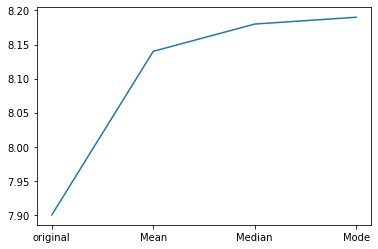

In [24]:
x=['original','Mean','Median','Mode']
y=[7.9, 8.14, 8.18, 8.19]
plt.plot(x, y)
plt.show()

In [55]:
df['pH'].fillna((mean1), inplace=True)
df['Temp'].fillna((mean2), inplace=True)
df['DO'].fillna((mean3), inplace=True)
df['Salinity'].fillna((mean4), inplace=True)
df['Conductivity'].fillna((mean5), inplace=True)
df['Ammonia'].fillna((mean6), inplace=True)

In [56]:
df.head()

,Date,pH,Temp,DO,Salinity,Conductivity,Ammonia
0,1974-10-17,7.900000,19.719374,15.832946,14.863006,2129.12337,0.670703
1,1974-10-17,8.081018,16.000000,15.832946,14.863006,2129.12337,0.670703
2,1974-11-26,8.300000,19.719374,15.832946,14.863006,2129.12337,0.670703
3,1974-11-26,8.081018,17.200000,15.832946,14.863006,2129.12337,0.670703
4,1974-12-02,8.081018,15.000000,15.832946,14.863006,2129.12337,0.670703


# WQI Calculation

In [57]:
# WQI Index
df.insert(7, 'Q pH',df['pH'])
df.insert(8, 'Q Temp',df['Temp'])
df.insert(9, 'Q DO',df['DO'])
df.insert(10, 'Q Salinity',df['Salinity'])
df.insert(11, 'Q Conductivity',df['Conductivity'])
df.insert(12, 'Q Ammonia',df['Ammonia'])

In [58]:
# WQI Index
df['Q pH']=df['Q pH'].apply(lambda x : 100*((float(x)-7)/(7.5 - 7)))

df['Q Temp']=df['Q Temp'].apply(lambda x : 100*((float(x)-0)/(20 - 0)))

df['Q DO']=df['Q DO'].apply(lambda x : 100*((float(x)-14.6)/(6 - 14.6)))

df['Q Salinity']=df['Q Salinity'].apply(lambda x : 100*((float(x)-0)/(35 - 0)))

df['Q Conductivity']=df['Q Conductivity'].apply(lambda x : 100*((float(x)-0)/(800 - 0)))

df['Q Ammonia']=df['Q Ammonia'].apply(lambda x : 100*((float(x)-0)/(0.06 - 0)))

In [59]:
df.head()

,Date,pH,Temp,DO,Salinity,Conductivity,Ammonia,Q pH,Q Temp,Q DO,Q Salinity,Q Conductivity,Q Ammonia
0,1974-10-17,7.900000,19.719374,15.832946,14.863006,2129.12337,0.670703,180.000000,98.596869,-14.336577,42.465731,266.140421,1117.838049
1,1974-10-17,8.081018,16.000000,15.832946,14.863006,2129.12337,0.670703,216.203608,80.000000,-14.336577,42.465731,266.140421,1117.838049
2,1974-11-26,8.300000,19.719374,15.832946,14.863006,2129.12337,0.670703,260.000000,98.596869,-14.336577,42.465731,266.140421,1117.838049
3,1974-11-26,8.081018,17.200000,15.832946,14.863006,2129.12337,0.670703,216.203608,86.000000,-14.336577,42.465731,266.140421,1117.838049
4,1974-12-02,8.081018,15.000000,15.832946,14.863006,2129.12337,0.670703,216.203608,75.000000,-14.336577,42.465731,266.140421,1117.838049


In [60]:
k=1/((1/7.5)+(1/20)+(1/6)+(1/35)+(1/800)+(1/0.06))

In [61]:
# WQI Index
df.insert(13, 'W pH',k/7.5)
df.insert(14, 'W Temp',k/20)
df.insert(15, 'W DO',k/6)
df.insert(16, 'W Salinity',k/35)
df.insert(17, 'W Conductivity',k/800)
df.insert(18, 'W Ammonia',k/0.06)

In [62]:
df.insert(19, 'Q pH * W pH',df['Q pH']*df['W pH'])
df.insert(20, 'Q Temp * W Temp',df['Q Temp']*df['W Temp'])
df.insert(21, 'Q DO * W DO',df['Q DO']*df['W DO'])
df.insert(22, 'Q Salinity * W Salinity',df['Q Salinity']*df['W Salinity'])
df.insert(23, 'Q Conductivity * W Conductivity',df['Q Conductivity']*df['W Conductivity'])
df.insert(24, 'Q Ammonia * W Ammonia',df['Q Ammonia']*df['W Ammonia'])

In [63]:
df.insert(25, 'Wn',df['W pH']+df['W Temp']+df['W DO']+df['W Salinity']+df['W Conductivity']+df['W Ammonia'])

In [64]:
df.insert(26, 'Q * W',df['Q pH * W pH']+df['Q Temp * W Temp']+df['Q DO * W DO']+
          df['Q Salinity * W Salinity']+df['Q Conductivity * W Conductivity']+df['Q Ammonia * W Ammonia'])

In [65]:
df.insert(27,'WQI',df['Q * W']/df['Wn'])

In [66]:
df.head()

,Date,pH,Temp,DO,Salinity,Conductivity,Ammonia,Q pH,Q Temp,Q DO,...,W Ammonia,Q pH * W pH,Q Temp * W Temp,Q DO * W DO,Q Salinity * W Salinity,Q Conductivity * W Conductivity,Q Ammonia * W Ammonia,Wn,Q * W,WQI
0,1974-10-17,7.900000,19.719374,15.832946,14.863006,2129.12337,0.670703,180.000000,98.596869,-14.336577,...,0.977718,1.407915,0.289200,-0.140171,0.071176,0.019516,1092.930933,1.0,1094.578569,1094.578569
1,1974-10-17,8.081018,16.000000,15.832946,14.863006,2129.12337,0.670703,216.203608,80.000000,-14.336577,...,0.977718,1.691090,0.234652,-0.140171,0.071176,0.019516,1092.930933,1.0,1094.807197,1094.807197
2,1974-11-26,8.300000,19.719374,15.832946,14.863006,2129.12337,0.670703,260.000000,98.596869,-14.336577,...,0.977718,2.033654,0.289200,-0.140171,0.071176,0.019516,1092.930933,1.0,1095.204309,1095.204309
3,1974-11-26,8.081018,17.200000,15.832946,14.863006,2129.12337,0.670703,216.203608,86.000000,-14.336577,...,0.977718,1.691090,0.252251,-0.140171,0.071176,0.019516,1092.930933,1.0,1094.824796,1094.824796
4,1974-12-02,8.081018,15.000000,15.832946,14.863006,2129.12337,0.670703,216.203608,75.000000,-14.336577,...,0.977718,1.691090,0.219987,-0.140171,0.071176,0.019516,1092.930933,1.0,1094.792531,1094.792531


# Classification into 5 categories based on WQI

In [50]:
print("Class division based on WQI values:")
print("Class 1: 0-25")
print("Class 2: 26-50")
print("Class 3: 51-75")
print("Class 4: 76-100")
print("Class 5: Above 100")

Class division based on WQI values:
Class 1: 0-25
Class 2: 26-50
Class 3: 51-75
Class 4: 76-100
Class 5: Above 100


In [36]:
df.insert(28,'Result',df['WQI'])

In [37]:
#float(df['WQI'])
#for y in df['WQI']:
def func(y):
    val = 0
    if y<=25:
        val = 1
    elif 25<y<=50:
        val = 2
    elif 50<y<=75:
        val = 3
    elif 75<y<=100:
        val = 4
    elif 100<y:
        val = 5
    return val

In [38]:
df['Result']=df['Result'].apply(lambda x: func(x))

# Final Dataset

In [42]:
df.head()

,Date,pH,Temp,DO,Salinity,Conductivity,Ammonia,Q pH,Q Temp,Q DO,...,Q pH * W pH,Q Temp * W Temp,Q DO * W DO,Q Salinity * W Salinity,Q Conductivity * W Conductivity,Q Ammonia * W Ammonia,Wn,Q * W,WQI,Result
0,1974-10-17,7.900000,19.719374,15.832946,14.863006,2129.12337,0.670703,180.000000,98.596869,-14.336577,...,1.407915,0.289200,-0.140171,0.071176,0.019516,1092.930933,1.0,1094.578569,1094.578569,5
1,1974-10-17,8.081018,16.000000,15.832946,14.863006,2129.12337,0.670703,216.203608,80.000000,-14.336577,...,1.691090,0.234652,-0.140171,0.071176,0.019516,1092.930933,1.0,1094.807197,1094.807197,5
2,1974-11-26,8.300000,19.719374,15.832946,14.863006,2129.12337,0.670703,260.000000,98.596869,-14.336577,...,2.033654,0.289200,-0.140171,0.071176,0.019516,1092.930933,1.0,1095.204309,1095.204309,5
3,1974-11-26,8.081018,17.200000,15.832946,14.863006,2129.12337,0.670703,216.203608,86.000000,-14.336577,...,1.691090,0.252251,-0.140171,0.071176,0.019516,1092.930933,1.0,1094.824796,1094.824796,5
4,1974-12-02,8.081018,15.000000,15.832946,14.863006,2129.12337,0.670703,216.203608,75.000000,-14.336577,...,1.691090,0.219987,-0.140171,0.071176,0.019516,1092.930933,1.0,1094.792531,1094.792531,5


In [43]:
df.to_csv('Full_Data_Empty_Result.csv')

In [44]:
np.min(df['WQI'])

1.9308108334415077

In [46]:
np.max(df['WQI'])

21348.78459419663